In [2]:
import json
import sys
import os
import pprint
import time
from datetime import datetime
import pandas as pd
import re
import collections
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# rs_basepath = ""
news_path = "worldnews/RS_worldnews"

submissions = pd.DataFrame()
submissions = pd.read_json(news_path, lines=True)

# submissions.head()


In [4]:
len(submissions)

101965

In [5]:
rc_news_path = "worldnews/RC_worldnews"

comments = pd.DataFrame()
comments = pd.read_json(rc_news_path, lines=True)
# comments.head()


In [6]:
news_urls_right = {"The_American_spectator":"spectator", "Breitbart":"breitbart",
                   "CBN":"cbn", "The_Daily_Caller": "dailycaller", "The_Daily_Mail": "dailymail",
                   "The_Daily_Wire" : "dailywire", "The_Fox_News": "foxnews", "The_Federalist": "thefederalist",
                   "National_Review":"nationalreview", "New_York_Post" : "nypost", "Newsmax": "newsmax",
                   "Reason": "reason", "Washington_Examiner":"washingtonexaminer",
                   "The_Washington_Times":"washingtontimes"
                   }
# "The_Wall_Street_Journal_Opinion_Base": "wsj/news/opinion",
# "The_Wall_Street_Journal_Opinion_Archive": "wsj/articles",

news_urls_center = {"Associated_Press":"apnews", "BBC":"bbc", "Bloomberg":"bloomberg",
                    "The_Christian_Science_Monitor":"csmonitor", "NPR_Online": "npr",
                    "Reuters" :"reuters", "The_Hill":"thehill", "USA_Today": "usatoday",
                    "Wall_Street_Journal_News": "wsj"}

news_urls_left = {"ABC_News": "abcnews", "The_Atlantic":"theatlantic", "The_Buzzfeed_News": "buzzfeednews",
                  "CBS_News": "cbsnews", "CNN_Online":"cnn", "The_Economist": "economist",
                  "The_Gaurdian": "theguardian", "NBC_News":"nbcnews", "The_New_York_Times":"nytimes",
                  "The_Los_Angeles_Times":"latimes", 
                  "Politico": "politico", "The_Washington_Post": "washingtonpost",
                  "Alternet": "alternet", "Democracy_Now": "democracynow", 
                  "The_Daily_Beast":"thedailybeast", "The_Huffington_Post":"huffpost",
                  "The Intercept":"theintercept", "Jacobin":"jacobinmag", "Mother Jones":"motherjones",
                  "MSNBC":"msnbc", "The_New_Yorker":"newyorker", "The_Nation":"thenation",
                  "Slate":"slate", "Vox":"vox"}
news_urls_social_media = ["youtube", "google", "twitter","yahoo", "youtu.be", "instagram", "reddit", "facebook", "spotify"]

all_urls = list(news_urls_right.values()) + list(news_urls_left.values()) + list(news_urls_center.values()) + news_urls_social_media

In [7]:
def get_leaning(domain_name):
    for s in news_urls_right.values():
        if domain_name.startswith(s) or "."+s in domain_name:
            return "right"
    for s in news_urls_left.values():
        if domain_name.startswith(s) or "."+s in domain_name:
            return "left"
    for s in news_urls_center.values():
        if domain_name.startswith(s) or "."+s in domain_name:
            return "center"
    for s in news_urls_social_media:
        if domain_name.startswith(s) or "."+s in domain_name:
            return "social"
    return "other" 

In [8]:
def get_base_domain(domain_name):
    # print(domain_name)
    for s in all_urls:
        if domain_name.startswith(s) or "."+s in domain_name:
            # print("Matched: ", s)
            return s
    return domain_name

In [9]:
submissions["leaning"] = submissions["domain"].apply(lambda x: get_leaning(x))
submissions["base_domain"] = submissions["domain"].apply(lambda x: get_base_domain(x))
submissions["full_date"] =  submissions["created_utc"].apply(lambda x: datetime.fromtimestamp(x))
submissions["date"] = submissions["full_date"].dt.date
# submissions.head()

posts_right = submissions.loc[submissions["leaning"] == "right"]
posts_left = submissions.loc[submissions["leaning"] == "left"]
posts_center = submissions.loc[submissions["leaning"] == "center"]
posts_social =  submissions.loc[submissions["leaning"] == "social"]
posts_other = submissions.loc[submissions["leaning"] == "other"]

all_included_posts = submissions.loc[submissions["leaning"] != "other"]

In [10]:
submissions[["date", "id", "leaning"]].groupby(["date", "leaning"]).count()["id"].reset_index(name="counts").to_csv("subs_wn.csv", index=False)

Posts with right leaning news outlet url:  1562
Posts with left leaning news outlet url:  8112
Posts with center leaning news outlet url:  10386
Posts from social media: 14397
Posts with other news outlet url:  67508
Total postas included in analysis:  34457
Total:  101965


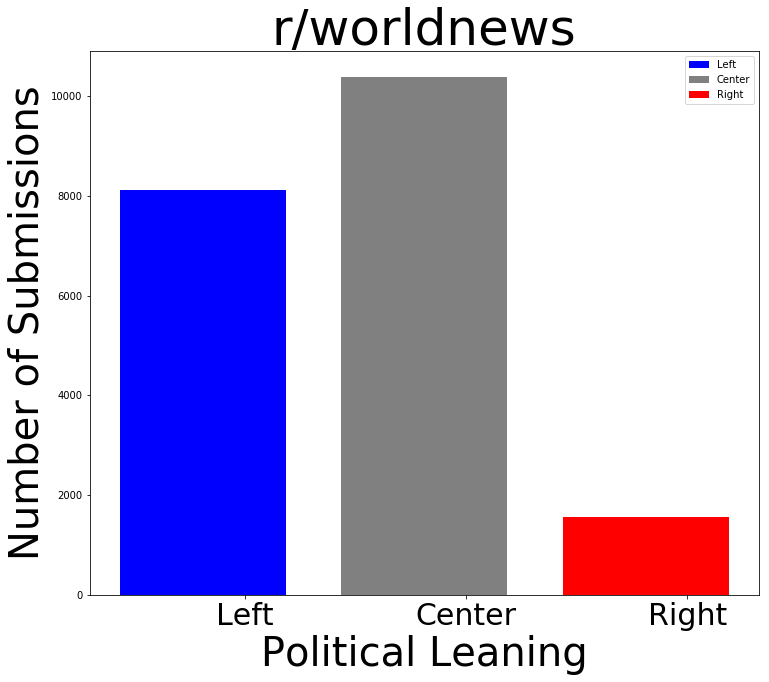

In [11]:
print("Posts with right leaning news outlet url: ", len(posts_right))
print("Posts with left leaning news outlet url: ", len(posts_left))
print("Posts with center leaning news outlet url: ", len(posts_center))
print("Posts from social media:", len(posts_social))
print("Posts with other news outlet url: ", len(posts_other))
print("Total postas included in analysis: ", len(all_included_posts))
print("Total: ", len(submissions))


plt.rcParams["figure.figsize"] = (12,10)
labels = ['Left', 'Center', 'Right']
num_subs = [len(posts_left), len(posts_center), len(posts_right)]

x = np.arange(len(labels))  # the label locations
width = 0.75  # the width of the bars

fig, ax = plt.subplots()
b1 =  ax.bar(x - width/4, num_subs, width, color=['b', 'grey', 'r'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Submissions', fontsize=40)
ax.set_xlabel('Political Leaning',fontsize=40)
ax.set_title('r/worldnews',fontsize=50)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=30)  
ax.legend(handles=b1, loc=1, labels=labels)
plt.savefig('worldnews/wn1.pdf', bbox_inches='tight', pad_inches=0)
plt.show()

# all_included_posts.plot.bar(x="leaning", y="counts")
# plt.xticks(np.arange(len(all_included_posts.counts)), all_included_posts.leaning)
# plt.xlabel("Leanings")
# plt.ylabel("Number of Posts")
# plt.title("Bar Plot for Number of Posts v/s Leaning of media outlet")
# plt.show()

In [10]:
domain_post_frequency =  all_included_posts.groupby("base_domain").count()["id"].reset_index(name='count').sort_values(['count'], ascending=False) 
print("Top 20 overall domains: \n\n")
domain_post_frequency.head(20)

Top 20 overall domains: 




,base_domain,count
43,twitter,7702
52,youtube,4617
33,reuters,4434
3,bbc,4419
39,theguardian,3022
8,cnn,1671
29,nytimes,1063
11,dailymail,727
50,yahoo,721
47,washingtonpost,696


In [11]:
right_domain_post_frequency =  posts_right.groupby("base_domain").count()["id"].reset_index(name='count').sort_values(['count'], ascending=False) 
print("Top 20 right leaning domains: \n\n")
right_domain_post_frequency.head(20)

Top 20 right leaning domains: 




,base_domain,count
3,dailymail,727
5,foxnews,526
0,breitbart,87
8,nypost,75
13,washingtontimes,53
2,dailycaller,49
7,newsmax,12
12,washingtonexaminer,11
4,dailywire,6
9,reason,5


In [12]:
left_domain_post_frequency =  posts_left.groupby("base_domain").count()["id"].reset_index(name='count').sort_values(['count'], ascending=False) 
print("Top 20 left leaning domains: \n\n")
left_domain_post_frequency.head(20)

Top 20 left leaning domains: 




,base_domain,count
17,theguardian,3022
3,cnn,1671
12,nytimes,1063
21,washingtonpost,696
0,abcnews,411
10,nbcnews,339
2,cbsnews,244
7,latimes,161
13,politico,138
16,thedailybeast,79


In [13]:
center_domain_post_frequency =  posts_center.groupby("base_domain").count()["id"].reset_index(name='count').sort_values(['count'], ascending=False) 
print("Top 20 center leaning domains: \n\n")
center_domain_post_frequency.head(20)

Top 20 center leaning domains: 




,base_domain,count
5,reuters,4434
1,bbc,4419
2,bloomberg,486
4,npr,307
7,usatoday,295
8,wsj,232
0,apnews,120
6,thehill,68
3,csmonitor,25


In [14]:
social_domain_post_frequency =  posts_social.groupby("base_domain").count()["id"].reset_index(name='count').sort_values(['count'], ascending=False) 
print("Top 20 social media domains: \n\n")
social_domain_post_frequency.head(20)

Top 20 social media domains: 




,base_domain,count
4,twitter,7702
7,youtube,4617
5,yahoo,721
1,google,552
6,youtu.be,530
0,facebook,194
3,reddit,80
2,instagram,1


In [15]:
overall_average_score =  all_included_posts.groupby("base_domain")['score'].mean().reset_index(name="average_score").sort_values(['average_score'], ascending=False) 
print("Top 20 overall average scores by domain:\n\n")
overall_average_score.head(20)

Top 20 overall average scores by domain:




,base_domain,average_score
10,dailycaller,500.795918
46,washingtonexaminer,416.000000
2,apnews,397.941667
7,cbsnews,266.680328
45,vox,266.666667
37,thedailybeast,261.164557
39,theguardian,246.089014
3,bbc,222.343743
4,bloomberg,220.783951
36,theatlantic,196.918919


In [16]:
right_average_score =  posts_right.groupby("base_domain")['score'].mean().reset_index(name="average_score").sort_values(['average_score'], ascending=False) 
print("Top 20 average scores by domain for right leaning outlets:\n\n")
right_average_score.head(20)

Top 20 average scores by domain for right leaning outlets:




,base_domain,average_score
2,dailycaller,500.795918
12,washingtonexaminer,416.000000
3,dailymail,96.324622
5,foxnews,90.121673
4,dailywire,29.833333
0,breitbart,28.011494
7,newsmax,21.416667
8,nypost,10.106667
13,washingtontimes,6.754717
9,reason,3.800000


In [17]:
left_average_score =  posts_left.groupby("base_domain")['score'].mean().reset_index(name="average_score").sort_values(['average_score'], ascending=False) 
print("Top 20 average scores by domain for left leaning outlets:\n\n")
left_average_score.head(20)

Top 20 average scores by domain for left leaning outlets:




,base_domain,average_score
2,cbsnews,266.680328
20,vox,266.666667
16,thedailybeast,261.164557
17,theguardian,246.089014
15,theatlantic,196.918919
10,nbcnews,193.185841
18,theintercept,124.212766
3,cnn,123.373429
13,politico,56.253623
0,abcnews,48.472019


In [18]:
center_average_score =  posts_center.groupby("base_domain")['score'].mean().reset_index(name="average_score").sort_values(['average_score'], ascending=False) 
print("Top 20 average scores by domain for center leaning outlets:\n\n")
center_average_score.head(20)

Top 20 average scores by domain for center leaning outlets:




,base_domain,average_score
0,apnews,397.941667
1,bbc,222.343743
2,bloomberg,220.783951
6,thehill,174.691176
5,reuters,150.709066
7,usatoday,113.400000
3,csmonitor,53.600000
4,npr,51.837134
8,wsj,9.862069


In [19]:
social_average_score =  posts_social.groupby("base_domain")['score'].mean().reset_index(name="average_score").sort_values(['average_score'], ascending=False) 
print("Top 20 average scores by domain for social media:\n\n")
social_average_score.head(20)

Top 20 average scores by domain for social media:




,base_domain,average_score
5,yahoo,139.883495
1,google,1.740942
3,reddit,1.175000
6,youtu.be,1.001887
4,twitter,1.001039
7,youtube,1.000866
2,instagram,1.000000
0,facebook,0.989691


In [20]:
average_right_posts_score = posts_right["score"].mean()
average_left_posts_score = posts_left["score"].mean()
average_center_posts_score = posts_center["score"].mean()
average_social_posts_score = posts_social["score"].mean()

Average score of comments for submissions

----------------------------------------------------


Average score of posts from right leaning outlets:  96.3943661971831
Average score of posts from left leaning outlets:  144.60207100591717
Average score of posts from center leaning outlets:  180.11833237049873
Average score of posts from social media:  7.985413627839133


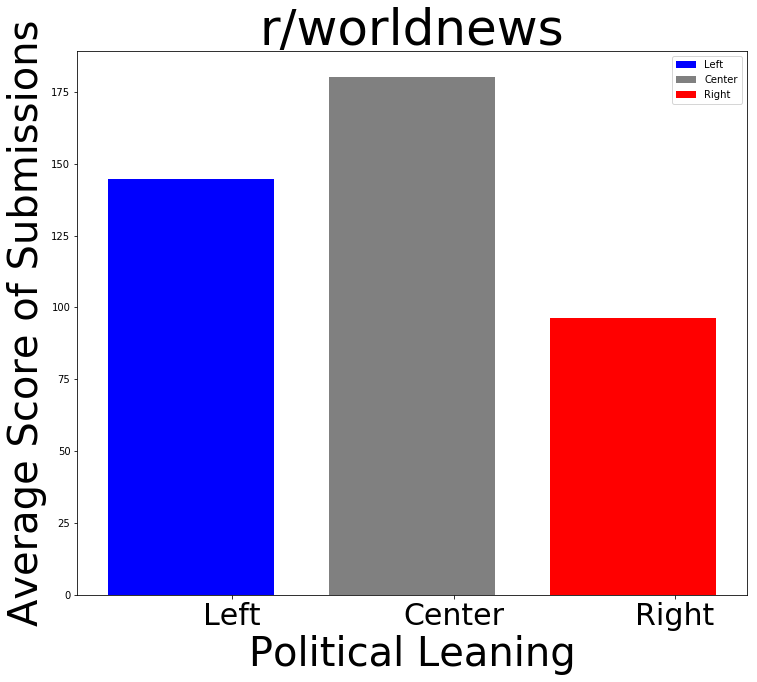

In [55]:
print("Average score of comments for submissions\n")
print("----------------------------------------------------\n\n")

print("Average score of posts from right leaning outlets: ", average_right_posts_score)
print("Average score of posts from left leaning outlets: ", average_left_posts_score)
print("Average score of posts from center leaning outlets: ", average_center_posts_score)
print("Average score of posts from social media: ", average_social_posts_score)


plt.rcParams["figure.figsize"] = (12,10)
labels = ['Left', 'Center', 'Right']
num_subs = [average_left_posts_score, average_center_posts_score, average_right_posts_score]

x = np.arange(len(labels))  # the label locations
width = 0.75  # the width of the bars

fig, ax = plt.subplots()
b1 = ax.bar(x - width/4, num_subs, width, color=['b', 'grey', 'r'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Score of Submissions', fontsize=40)
ax.set_xlabel('Political Leaning',fontsize=40)
ax.set_title('r/worldnews',fontsize=50)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=30)  

ax.legend(handles=b1, loc=1, labels=labels)
plt.savefig('worldnews/wn2.pdf', bbox_inches='tight', pad_inches=0)
plt.show()

In [22]:
comments["p_link_id"] = comments["link_id"].apply(lambda x: x.split("_")[1])

In [23]:
comments_right = comments.loc[comments['p_link_id'].isin(posts_right["id"])]
comments_right["leaning"] = "right"

comments_left = comments.loc[comments['p_link_id'].isin(posts_left["id"])]
comments_left["leaning"] = "left"

comments_center = comments.loc[comments['p_link_id'].isin(posts_center["id"])]
comments_center["leaning"] = "center"

comments_social = comments.loc[comments['p_link_id'].isin(posts_social["id"])]
comments_social["leaning"] = "social"

C:\Users\mansi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mansi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\mansi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#

Average number of comments for submissions

----------------------------------------------------


Average number of comments per post from right leaning outlets:  29.596030729833547
Average number of comments per post from left leaning outlets:  32.86612426035503
Average number of comments per post from center leaning outlets:  38.46591565569035
Average number of comments per post from social media:  1.3863999444328678


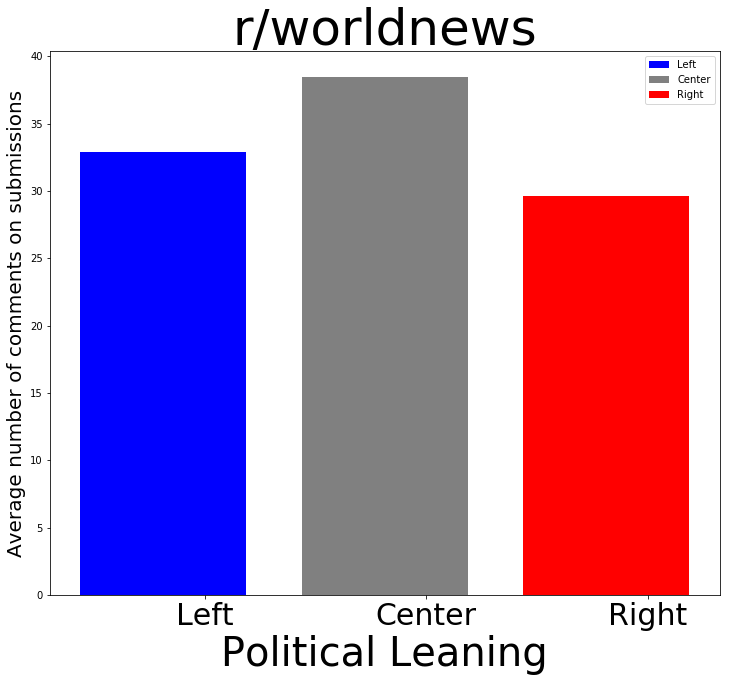

In [59]:
print("Average number of comments for submissions\n")
print("----------------------------------------------------\n\n")

print("Average number of comments per post from right leaning outlets: ", str(len(comments_right)/len(posts_right)))
print("Average number of comments per post from left leaning outlets: ", str(len(comments_left)/len(posts_left)))
print("Average number of comments per post from center leaning outlets: ", str(len(comments_center)/len(posts_center)))
print("Average number of comments per post from social media: ", str(len(comments_social)/len(posts_social)))



plt.rcParams["figure.figsize"] = (12,10)
labels = ['Left', 'Center', 'Right']
num_subs = [len(comments_left)/len(posts_left), len(comments_center)/len(posts_center), len(comments_right)/len(posts_right)]

x = np.arange(len(labels))  # the label locations
width = 0.75  # the width of the bars

fig, ax = plt.subplots()
b1 = ax.bar(x - width/4, num_subs, width, color=['b', 'grey', 'r'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average number of comments on submissions', fontsize=20)
ax.set_xlabel('Political Leaning',fontsize=40)
ax.set_title('r/worldnews',fontsize=50)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=30)  
ax.legend(handles=b1, loc=1, labels=labels)
plt.savefig('worldnews/wn3.pdf', bbox_inches='tight', pad_inches=0)
plt.show()

In [25]:
average_right_comments_score = comments_right["score"].mean()
average_left_comments_score = comments_left["score"].mean()
average_center_comments_score = comments_center["score"].mean()
average_social_comments_score = comments_social["score"].mean()

Average score of comments for submissions

----------------------------------------------------


Average score of comments on posts from right leaning outlets:  8.05892405200199
Average score of comments on posts from left leaning outlets:  8.955451783503994
Average score of comments on posts from center leaning outlets:  10.505017433987389
Average score of comments on posts from social media:  8.461472945891783


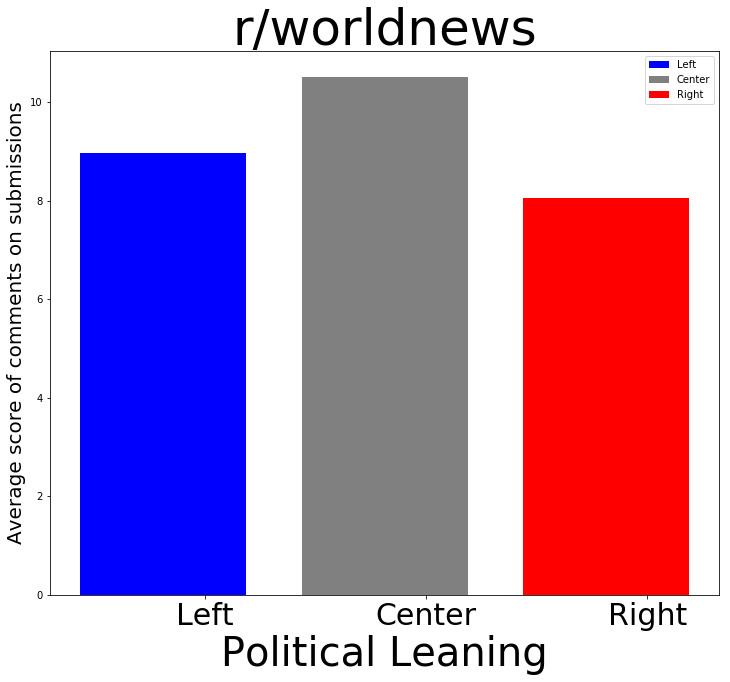

In [58]:
print("Average score of comments for submissions\n")
print("----------------------------------------------------\n\n")

print("Average score of comments on posts from right leaning outlets: ", average_right_comments_score)
print("Average score of comments on posts from left leaning outlets: ", average_left_comments_score)
print("Average score of comments on posts from center leaning outlets: ", average_center_comments_score)
print("Average score of comments on posts from social media: ", average_social_comments_score)

plt.rcParams["figure.figsize"] = (12,10)
labels = ['Left', 'Center', 'Right']
num_subs = [average_left_comments_score, average_center_comments_score, average_right_comments_score]

x = np.arange(len(labels))  # the label locations
width = 0.75  # the width of the bars

fig, ax = plt.subplots()
b1 = ax.bar(x - width/4, num_subs, width, color=['b', 'grey', 'r'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average score of comments on submissions', fontsize=20)
ax.set_xlabel('Political Leaning',fontsize=40)
ax.set_title('r/worldnews',fontsize=50)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=30)  
ax.legend(handles=b1, loc=1, labels=labels)
plt.savefig('worldnews/wn4.pdf', bbox_inches='tight', pad_inches=0)
plt.show()

In [27]:
average_right_controversiality_score = comments_right["controversiality"].mean()
average_left_controversiality_score = comments_left["controversiality"].mean()
average_center_controversiality_score = comments_center["controversiality"].mean()
average_social_controversiality_score = comments_social["controversiality"].mean()

In [28]:
print("Average controversiality score of comments for submissions\n")
print("----------------------------------------------------\n\n")

print("Average controversiality score of comments on posts from right leaning outlets: ", average_right_controversiality_score)
print("Average controversiality score of comments on posts from left leaning outlets: ", average_left_controversiality_score)
print("Average controversiality score of comments on posts from center leaning outlets: ", average_center_controversiality_score)
print("Average controversiality score of comments on posts from social media: ", average_social_controversiality_score)

Average controversiality score of comments for submissions

----------------------------------------------------


Average controversiality score of comments on posts from right leaning outlets:  0.08635272231716022
Average controversiality score of comments on posts from left leaning outlets:  0.07479089306477626
Average controversiality score of comments on posts from center leaning outlets:  0.0797207558315624
Average controversiality score of comments on posts from social media:  0.03722444889779559


In [29]:
## Occurence of left leaning entities in title
right_keywords = ["donald", "trump", "republican", "gop"]
left_keywords = ["hillary", "clinton", "democrat", "dnc"]

total_score_right = 0
total_score_left = 0

count_right_in_right = posts_right.loc[posts_right["title"].apply(lambda x: any(s in x for s in right_keywords))].count()["id"]
total_score_right += posts_right.loc[posts_right["title"].apply(lambda x: any(s in x for s in right_keywords))]["score"].sum()
count_left_in_right =  posts_right.loc[posts_right["title"].apply(lambda x: any(s in x for s in left_keywords))].count()["id"]
total_score_left += posts_right.loc[posts_right["title"].apply(lambda x: any(s in x for s in left_keywords))]["score"].sum()

count_right_in_left = posts_left.loc[posts_left["title"].apply(lambda x: any(s in x for s in right_keywords))].count()["id"]
total_score_right += posts_left.loc[posts_left["title"].apply(lambda x: any(s in x for s in right_keywords))]["score"].sum()
count_left_in_left =  posts_left.loc[posts_left["title"].apply(lambda x: any(s in x for s in left_keywords))].count()["id"]
total_score_left += posts_left.loc[posts_left["title"].apply(lambda x: any(s in x for s in left_keywords))]["score"].sum()

count_right_in_center = posts_center.loc[posts_center["title"].apply(lambda x: any(s in x for s in right_keywords))].count()["id"]
total_score_right += posts_center.loc[posts_center["title"].apply(lambda x: any(s in x for s in right_keywords))]["score"].sum()
count_left_in_center = posts_center.loc[posts_center["title"].apply(lambda x: any(s in x for s in left_keywords))].count()["id"]
total_score_left += posts_center.loc[posts_center["title"].apply(lambda x: any(s in x for s in left_keywords))]["score"].sum()

count_right_in_social = posts_social.loc[posts_social["title"].apply(lambda x: any(s in x for s in right_keywords))].count()["id"]
total_score_right += posts_social.loc[posts_social["title"].apply(lambda x: any(s in x for s in right_keywords))]["score"].sum()
count_left_in_social = posts_social.loc[posts_social["title"].apply(lambda x: any(s in x for s in left_keywords))].count()["id"]
total_score_left += posts_left.loc[posts_left["title"].apply(lambda x: any(s in x for s in left_keywords))]["score"].sum()

total_length = len(all_included_posts)
average_score_right = total_score_right / total_length
average_score_left = total_score_left / total_length

In [30]:
print("Right leaning words: ", right_keywords)
print("Number of mentions of right leaning words in right leaning posts: ", count_right_in_right)
print("Number of mentions of right leaning words in left leaning posts: ", count_right_in_left)
print("Number of mentions of right leaning words in center leaning posts: ", count_right_in_center)
print("Number of mentions of right leaning words in social media posts: ", count_right_in_social)
print("\n")
print("Average score of posts with right leaning words: ", average_score_right)




print("\n\n---------------------------------------------------------------------------------------------------\n\n")

print("Left leaning words: ", left_keywords)
print("Number of mentions of left leaning words in right leaning posts: ", count_left_in_right)
print("Number of mentions of left leaning words in left leaning posts: ", count_left_in_left)
print("Number of mentions of left leaning words in center leaning posts: ", count_left_in_center)
print("Number of mentions of left leaning words in social media posts: ", count_left_in_social)
print("\n")
print("Average score of posts with left leaning words: ", average_score_left)

Right leaning words:  ['donald', 'trump', 'republican', 'gop']
Number of mentions of right leaning words in right leaning posts:  1
Number of mentions of right leaning words in left leaning posts:  3
Number of mentions of right leaning words in center leaning posts:  4
Number of mentions of right leaning words in social media posts:  34


Average score of posts with right leaning words:  0.0015961923556897


---------------------------------------------------------------------------------------------------


Left leaning words:  ['hillary', 'clinton', 'democrat', 'dnc']
Number of mentions of left leaning words in right leaning posts:  0
Number of mentions of left leaning words in left leaning posts:  2
Number of mentions of left leaning words in center leaning posts:  7
Number of mentions of left leaning words in social media posts:  6


Average score of posts with left leaning words:  1.2574513161331515


In [31]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from math import sqrt

In [32]:
submissions.columns

Index(['archived', 'author', 'author_flair_css_class', 'author_flair_text',
       'contest_mode', 'created_utc', 'distinguished', 'domain', 'downs',
       'edited', 'gilded', 'hide_score', 'id', 'is_self',
       'link_flair_css_class', 'link_flair_text', 'locked', 'media',
       'media_embed', 'name', 'num_comments', 'over_18', 'permalink',
       'post_hint', 'preview', 'quarantine', 'retrieved_on', 'saved', 'score',
       'secure_media', 'secure_media_embed', 'selftext', 'spoiler', 'stickied',
       'subreddit', 'subreddit_id', 'thumbnail', 'title', 'ups', 'url',
       'leaning', 'base_domain', 'full_date', 'date'],
      dtype='object')

In [33]:
domain_post_frequency[domain_post_frequency["base_domain"]=="foxnews"]["count"]

domain_post_frequency_dict = domain_post_frequency.set_index('base_domain').T.to_dict()
domain_post_frequency_dict.get("youtube").get("count")

4617

In [34]:
def get_count(domain):
    if domain in domain_post_frequency_dict.keys():
        return domain_post_frequency_dict.get(domain).get("count")
    else:
        return 0
    

In [35]:
submissions["full_date"] =  submissions["created_utc"].apply(lambda x: datetime.fromtimestamp(x))
submissions["date"] = submissions["full_date"].dt.date
# submissions["time"] = submissions["full_date"].str.split(" ")[1]
# submissions["year"] =  pd.DatetimeIndex(submissions["date"]).year
# submissions["month"] =  pd.DatetimeIndex(submissions["date"]).month
# submissions["day"] =  pd.DatetimeIndex(submissions["date"]).day
# submissions["week"] =  pd.DatetimeIndex(submissions["date"]).week

submissions["hour"] =  pd.DatetimeIndex(submissions["full_date"]).hour
submissions["title"] =  submissions["title"].apply(lambda x: x.lower())

submissions["history"] = submissions["base_domain"].apply(lambda x: get_count(x))
# submissions["min"] =  pd.DatetimeIndex(submissions["time"]).minute

# submissions[["hour"]]

In [36]:
submissions.columns

Index(['archived', 'author', 'author_flair_css_class', 'author_flair_text',
       'contest_mode', 'created_utc', 'distinguished', 'domain', 'downs',
       'edited', 'gilded', 'hide_score', 'id', 'is_self',
       'link_flair_css_class', 'link_flair_text', 'locked', 'media',
       'media_embed', 'name', 'num_comments', 'over_18', 'permalink',
       'post_hint', 'preview', 'quarantine', 'retrieved_on', 'saved', 'score',
       'secure_media', 'secure_media_embed', 'selftext', 'spoiler', 'stickied',
       'subreddit', 'subreddit_id', 'thumbnail', 'title', 'ups', 'url',
       'leaning', 'base_domain', 'full_date', 'date', 'hour', 'history'],
      dtype='object')

In [37]:
submissions["history"].head()

0       0
1       0
2       0
3    7702
4    4617
Name: history, dtype: int64

In [38]:
embeddings = {}

with open('glove.6B.50d.txt',encoding="utf8") as f:
    lines = f.read().strip().split('\n')
    for line in lines:
        word = line.split()[0]
        vector = np.array(line.split()[1:], dtype=np.float)
        embeddings[word] = vector

In [39]:
def get_embeddings(title):
    pattern = re.compile('[\W_]+')
    s = "this is a sample sentence?"
    tokens = pattern.sub(' ', title).lower().split()
    title_embed = np.array([embeddings[word] for word in tokens if word in embeddings])
    avg_title_embed = np.mean(title_embed, axis=0)
#     print("Returning: ", avg_title_embed)
    return avg_title_embed

In [40]:
def get_time_of_day(hour):
    if hour >=0 and hour<=6:
        return "night"
    elif hour>6  and hour<=12:
        return "morning"
    elif hour>12 and hour<=18:
        return "noon"
    elif hour>18 and hour<=24:
        return "evening"

In [41]:
submissions["tod"] = submissions["hour"].apply(lambda x: get_time_of_day(x))

In [42]:
plt.rcParams["figure.figsize"] = (20,10)

xx = submissions[["num_comments", "title", "hour", "leaning", "score", "history", "tod"]]

leaning_dummies = pd.get_dummies(xx["leaning"], prefix="is")
xx= pd.concat([xx, leaning_dummies], axis=1)
xx.drop("leaning", axis=1, inplace=True)


tod_dummies = pd.get_dummies(xx["tod"], prefix="is")
xx= pd.concat([xx, tod_dummies], axis=1)
xx.drop("tod", axis=1, inplace=True)

# print(len(X))

# print(xx.corr(method="pearson"))
# plt.matshow(xx.corr(method="pearson"))
# plt.show()
print(xx.corr())

corrs = xx.corr()

corrs.to_csv("corrs.csv",index=False)


              num_comments      hour     score   history  is_center   is_left  \
num_comments      1.000000 -0.007656  0.773347 -0.006316   0.025739  0.015059   
hour             -0.007656  1.000000 -0.008771  0.029591  -0.006825  0.012098   
score             0.773347 -0.008771  1.000000 -0.006324   0.020952  0.010964   
history          -0.006316  0.029591 -0.006324  1.000000   0.350157  0.047094   
is_center         0.025739 -0.006825  0.020952  0.350157   1.000000 -0.099007   
is_left           0.015059  0.012098  0.010964  0.047094  -0.099007  1.000000   
is_other         -0.005533 -0.032316 -0.002298 -0.782698  -0.471373 -0.411508   
is_right          0.004718  0.002942  0.000432 -0.042209  -0.042004 -0.036670   
is_social        -0.028207  0.039386 -0.023749  0.737317  -0.136549 -0.119207   
is_evening       -0.009466  0.723474 -0.010700  0.013966  -0.008715  0.001696   
is_morning       -0.005329 -0.101173 -0.005873  0.000116   0.013447  0.012252   
is_night          0.009239 -

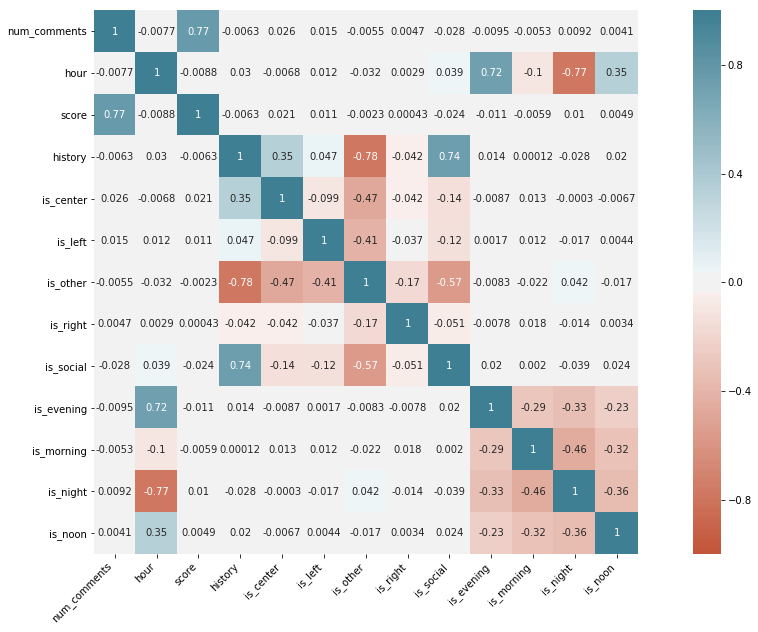

In [43]:
import seaborn as sns
corr = xx.corr(method='pearson')
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

[[1.         0.49425816 0.96438209 0.49526325 0.5193     0.51129348
  0.49584996 0.50353834 0.47885053 0.4929005  0.49600335 0.5069293
  0.50306752]
 [0.49425816 1.         0.49342213 0.52218703 0.49488149 0.50907278
  0.47577109 0.50220621 0.52952419 0.94793613 0.42437923 0.03527365
  0.75143281]
 [0.96438209 0.49342213 1.         0.49525724 0.51571135 0.50822255
  0.4982763  0.50032418 0.48219166 0.49197558 0.49559522 0.50752013
  0.50371054]
 [0.49526325 0.52218703 0.49525724 1.         0.75188455 0.53529457
  0.03284975 0.46836192 0.95277953 0.51047414 0.50008679 0.47917693
  0.51474961]
 [0.5193     0.49488149 0.51571135 0.75188455 1.         0.42598734
  0.17265389 0.46851533 0.39822454 0.49346395 0.51008489 0.49977146
  0.49498537]
 [0.51129348 0.50907278 0.50822255 0.53529457 0.42598734 1.
  0.20878978 0.47251007 0.41101795 0.50127209 0.50918858 0.48743443
  0.50327813]
 [0.49584996 0.47577109 0.4982763  0.03284975 0.17265389 0.20878978
  1.         0.37039184 0.12004261 0.4937

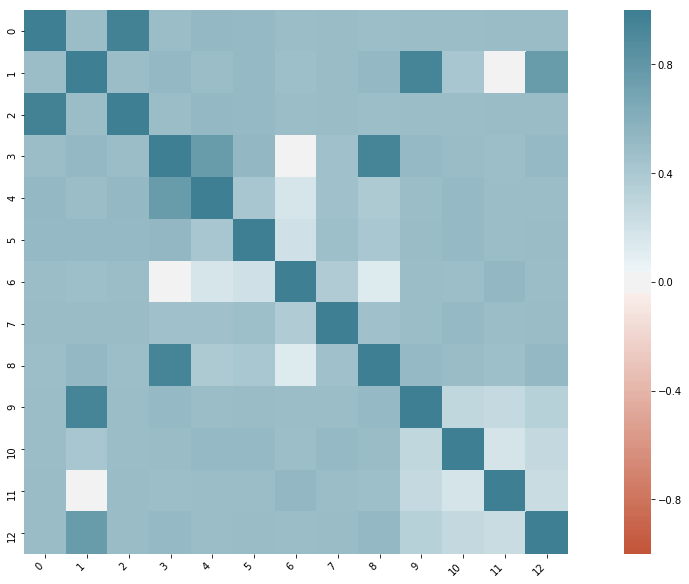

In [44]:
n=6
r=xx.corr()
t=r*np.sqrt((n-2)/(1-r*r))

import scipy.stats as ss
pvalues = ss.t.cdf(t, n-2)
print(pvalues)

corr = xx.corr(method='pearson')
ax = sns.heatmap(
    pvalues, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [45]:
random_seed = 2

In [46]:
X = submissions[["title", "hour", "leaning", "score"]]
# print(len(X))
hours_dummies = pd.get_dummies(X["hour"], prefix="hour")
X = pd.concat([X, hours_dummies], axis=1)
X.drop("hour", axis=1, inplace=True)
# print(len(X))

leaning_dummies = pd.get_dummies(X["leaning"], prefix="is")
X = pd.concat([X, leaning_dummies], axis=1)
X.drop("leaning", axis=1, inplace=True)
# print(len(X))

# print(X.corr())

X['vector'] = X['title'].apply(get_embeddings)
# X = pd.concat([X, ])
X.drop("title", axis=1, inplace=True)
# print(len(X))
s = X["vector"].apply(pd.Series)
X = pd.concat([X,s], axis=1)
X.drop("vector", axis=1, inplace=True)
# print(len(X))  

X.dropna(axis=0, inplace=True)
y = X["score"]
X.drop("score", axis=1, inplace=True)
# print(len(X))

# print("Columns: ", X.columns)
# print(X.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = random_seed)

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

score_rmse = sqrt(mean_squared_error(y_test, y_pred))
score_r2 = r2_score(y_test, y_pred)
print("Root Mean squared error: %.2f"
      % score_rmse)
print('Variance(R2) score: %.2f' % score_r2)   

C:\Users\mansi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


Root Mean squared error: 1545.77
Variance(R2) score: 0.00


In [47]:
X = submissions[["title", "hour",  "score"]]
hours_dummies = pd.get_dummies(X["hour"], prefix="hour")
X = pd.concat([X, hours_dummies], axis=1)
X.drop("hour", axis=1, inplace=True)

# leaning_dummies = pd.get_dummies(X["leaning"], prefix="is")
# X = pd.concat([X, leaning_dummies], axis=1)
# X = X.drop("leaning", axis=1)

X['vector'] = X['title'].apply(get_embeddings)
# X = pd.concat([X, ])
X.drop("title", axis=1, inplace=True)
s = X["vector"].apply(pd.Series)
X = pd.concat([X,s], axis=1)
X.drop("vector", axis=1, inplace=True)

X.dropna(axis=0, inplace=True)
y = X["score"]
X.drop("score", axis=1,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = random_seed)

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)


score_no_lean_mse = sqrt(mean_squared_error(y_test, y_pred))
score_no_lean_r2 = r2_score(y_test, y_pred)

print("Root Mean squared error: %.2f"
      % score_no_lean_mse)

print('Variance(R2) score: %.2f' % score_no_lean_r2)

C:\Users\mansi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


Root Mean squared error: 1545.87
Variance(R2) score: 0.00


In [48]:
X = submissions[["num_comments", "title", "hour",  "score"]]
hours_dummies = pd.get_dummies(X["hour"], prefix="hour")
X = pd.concat([X, hours_dummies], axis=1)
X.drop("hour", axis=1, inplace=True)

X['vector'] = X['title'].apply(get_embeddings)
# X = pd.concat([X, ])
X.drop("title", axis=1, inplace=True)
s = X["vector"].apply(pd.Series)
X = pd.concat([X,s], axis=1)
X.drop("vector", axis=1, inplace=True)

X.dropna(axis=0, inplace=True)
y = X["score"]
X.drop("score", axis=1,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = random_seed)

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)


score_no_lean_mse = sqrt(mean_squared_error(y_test, y_pred))
score_no_lean_r2 = r2_score(y_test, y_pred)

print("Root Mean squared error: %.2f"
      % score_no_lean_mse)

print('Variance(R2) score: %.2f' % score_no_lean_r2)

C:\Users\mansi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


Root Mean squared error: 965.80
Variance(R2) score: 0.61


In [49]:
X = submissions[["num_comments", "title", "hour", "score", "leaning"]]
hours_dummies = pd.get_dummies(X["hour"], prefix="hour")
X = pd.concat([X, hours_dummies], axis=1)
X.drop("hour", axis=1, inplace=True)

leaning_dummies = pd.get_dummies(X["leaning"], prefix="is")
X = pd.concat([X, leaning_dummies], axis=1)
X = X.drop("leaning", axis=1)

X['vector'] = X['title'].apply(get_embeddings)
# X = pd.concat([X, ])
X.drop("title", axis=1, inplace=True)
s = X["vector"].apply(pd.Series)
X = pd.concat([X,s], axis=1)
X.drop("vector", axis=1, inplace=True)

X.dropna(axis=0, inplace=True)
y = X["score"]
X.drop("score", axis=1,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = random_seed)

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)


score_no_lean_mse = sqrt(mean_squared_error(y_test, y_pred))
score_no_lean_r2 = r2_score(y_test, y_pred)

print("Root Mean squared error: %.2f"
      % score_no_lean_mse)

print('Variance(R2) score: %.2f' % score_no_lean_r2)

C:\Users\mansi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


Root Mean squared error: 965.78
Variance(R2) score: 0.61


In [50]:
X = submissions[["num_comments", "hour",  "score"]]
hours_dummies = pd.get_dummies(X["hour"], prefix="hour")
X = pd.concat([X, hours_dummies], axis=1)
X.drop("hour", axis=1, inplace=True)

# leaning_dummies = pd.get_dummies(X["leaning"], prefix="is")
# X = pd.concat([X, leaning_dummies], axis=1)
# X = X.drop("leaning", axis=1)

# X['vector'] = X['title'].apply(get_embeddings)
# # X = pd.concat([X, ])
# X.drop("title", axis=1, inplace=True)
# s = X["vector"].apply(pd.Series)
# X = pd.concat([X,s], axis=1)
X.drop("vector", axis=1, inplace=True)

X.dropna(axis=0, inplace=True)
y = X["score"]
X.drop("score", axis=1,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = random_seed)

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)


score_no_lean_mse = sqrt(mean_squared_error(y_test, y_pred))
score_no_lean_r2 = r2_score(y_test, y_pred)

print("Root Mean squared error: %.2f"
      % score_no_lean_mse)

print('Variance(R2) score: %.2f' % score_no_lean_r2)

KeyError: "['vector'] not found in axis"

In [ ]:
model.coef_

In [ ]:
import matplotlib.pyplot as plt

